In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib notebook


plt.xkcd()

In [2]:
def saturate(val, min_lim, max_lim):
    return max(min(val, max_lim), min_lim)

def next_number_cases(total_cases, active_cases, r, population, incubation_period):
    immune_fraction = total_cases[-1] / population
    
    new_cases = active_cases[-1] * r * (1 - immune_fraction)
    closed_cases = active_cases[-incubation_period]

    next_total_cases = saturate(total_cases[-1] + new_cases, 0, population)
    next_active_cases = saturate(active_cases[-1] + new_cases - closed_cases, 0, population)
    
    return (next_total_cases, next_active_cases)


def compute_cases_time_series(population, incubation_period, R0, initial_cases, num_days):
    r_per_day = R0 / incubation_period
    active_cases = [0 for _ in range(incubation_period)] + [initial_cases]
    total_cases = [0 for _ in range(incubation_period)] + [initial_cases]

    for i in range(num_days):
        next_total, next_active = next_number_cases(total_cases, active_cases, r_per_day, population, incubation_period)
        total_cases.append(next_total)
        active_cases.append(next_active)
    
    return total_cases, active_cases

R0 = 1.5     Total Infected Population = 1521         Max active cases = 1055
R0 = 2.0     Total Infected Population = 3149         Max active cases = 1557
R0 = 3.0     Total Infected Population = 38854         Max active cases = 11977
R0 = 3.5     Total Infected Population = 1028770         Max active cases = 273443


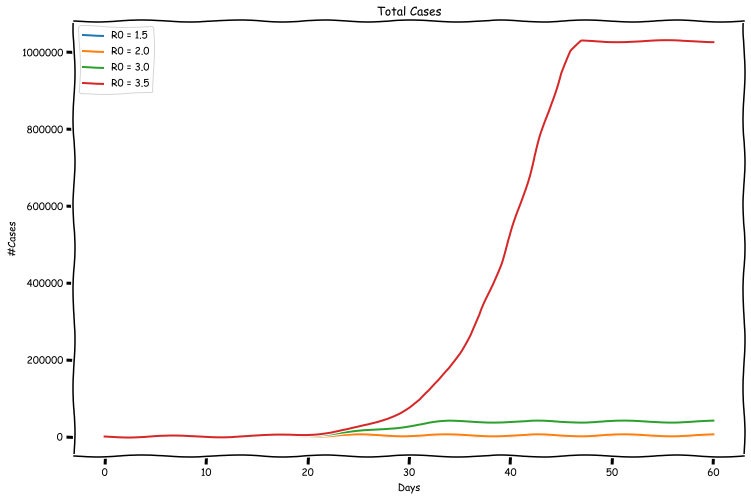

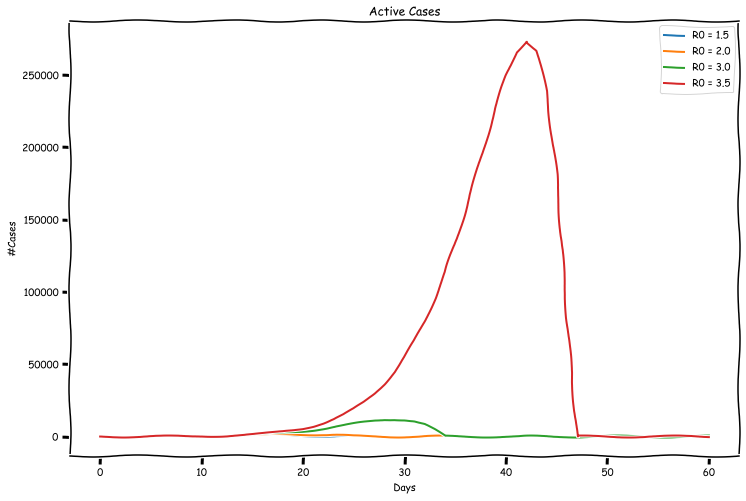

In [9]:
num_days = 50
population = 10_000_000
incubation_period = 10
initial_cases = 300
R0 = [1.5, 2, 3, 3.5]

total_cases = [None for _ in R0]
active_cases = [None for _ in R0]

for i, r0 in enumerate(R0):
    total_cases[i], active_cases[i] = compute_cases_time_series(population, incubation_period, r0, initial_cases, num_days)

t = range(len(total_cases[0]))

fig = plt.figure(figsize=(12, 8))
for i, r0 in enumerate(R0):
    plt.plot(t, total_cases[i])
plt.legend(['R0 = %.1f' % r0 for r0 in R0])
plt.title('Total Cases')
plt.xlabel('Days')
plt.ylabel('#Cases')

fig = plt.figure(figsize=(12, 8))
for i, r0 in enumerate(R0):
    plt.plot(t, active_cases[i])
plt.legend(['R0 = %.1f' % r0 for r0 in R0])
plt.title('Active Cases')
plt.xlabel('Days')
plt.ylabel('#Cases')


for i, r0 in enumerate(R0):
    print('R0 = %.1f     Total Infected Population = %d         Max active cases = %d' % (r0, total_cases[i][-1], max(active_cases[i])))
